## Problem Statement:

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

#### Using the data set of sales of houses in Australia, Company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

#### Business Goal:
1. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
2. Determine the optimal value of lambda/alpha for ridge and lasso regression. 
3. This model will then be used by the management to understand how exactly the prices vary with the variables. 
4. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
5. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### The solution is divided into the following sections:
i. Data understanding and exploration. ii. Data cleaning. iii. Data preparation. iv. Model building and evaluation.

#### i. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import norm
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# reading the dataset
housing_data = pd.read_csv('train.csv')

In [3]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_data.shape

(1460, 81)

In [5]:
# summary of the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_data.describe([0, 0.25, 0.50, 0.75, 0.99, 1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
0%,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
100%,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housing_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


#### ii. Data cleaning.
#### Find out Missing data in housing data

In [8]:
# Chekcing the percentage of Null values/missing data in all the columns
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### Filltering the missing data: If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [9]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [10]:
for i in null_has_meaning:
    housing_data[i].fillna("None", inplace=True)
    housing_data[i].fillna("None", inplace=True)

In [11]:
#missing data
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [12]:
#LotFrontage has too many Null values better to drop it.
housing_data.drop("LotFrontage", axis=1, inplace=True)

In [13]:
#missing data
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [14]:
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)
housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median(), inplace=True)
housing_data["MasVnrType"].fillna("None", inplace=True)

In [15]:
#missing data
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [16]:
#Now that only one row has a null entry, we will drop the row.
housing_data.dropna(inplace=True)

In [17]:
#missing data
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [18]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [19]:
# Dropping ID Columns from dataset since it is not use in the prediction usecase
housing_data.drop('Id', axis=1, inplace=True)

#### Data Exploration

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

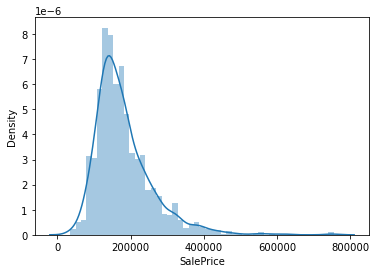

In [20]:
sns.distplot(housing_data['SalePrice'])

In [21]:
print("Skewness: %f" % housing_data['SalePrice'].skew())
print("Kurtosis: %f" % housing_data['SalePrice'].kurt())

Skewness: 1.881943
Kurtosis: 6.529263


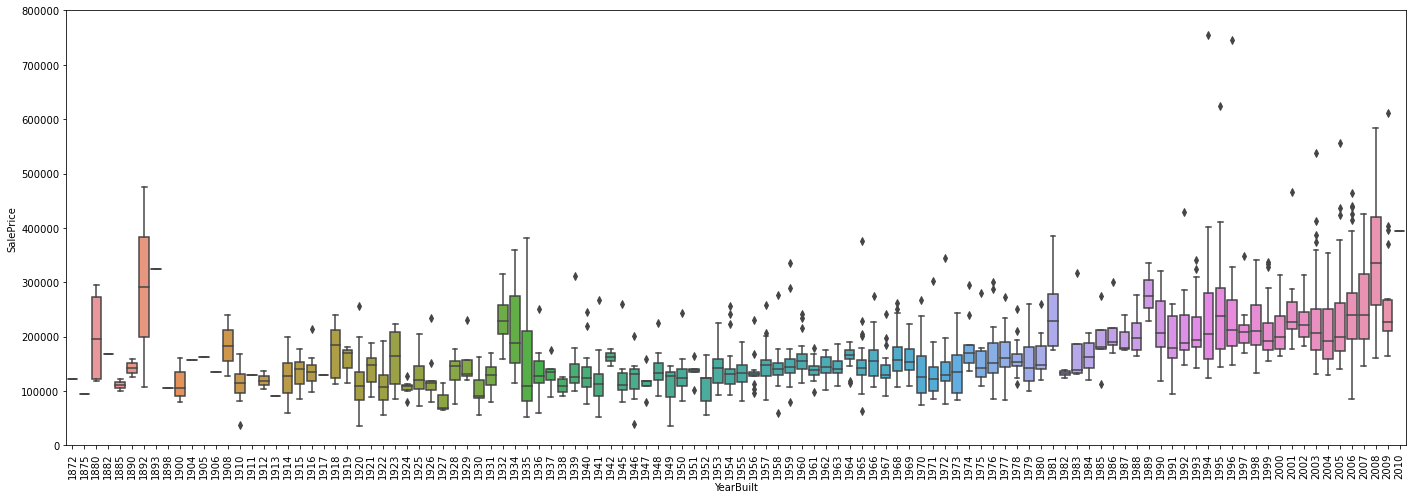

In [22]:
var = 'YearBuilt'
data = pd.concat([housing_data['SalePrice'], housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(24, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

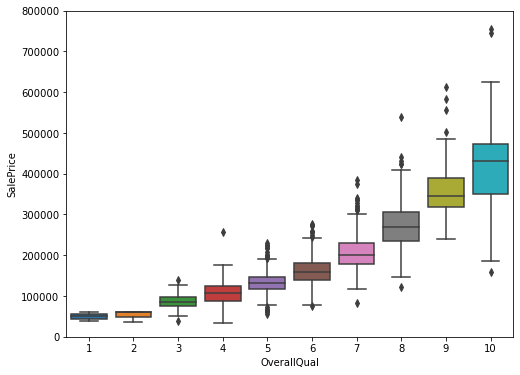

In [23]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing_data['SalePrice'], housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

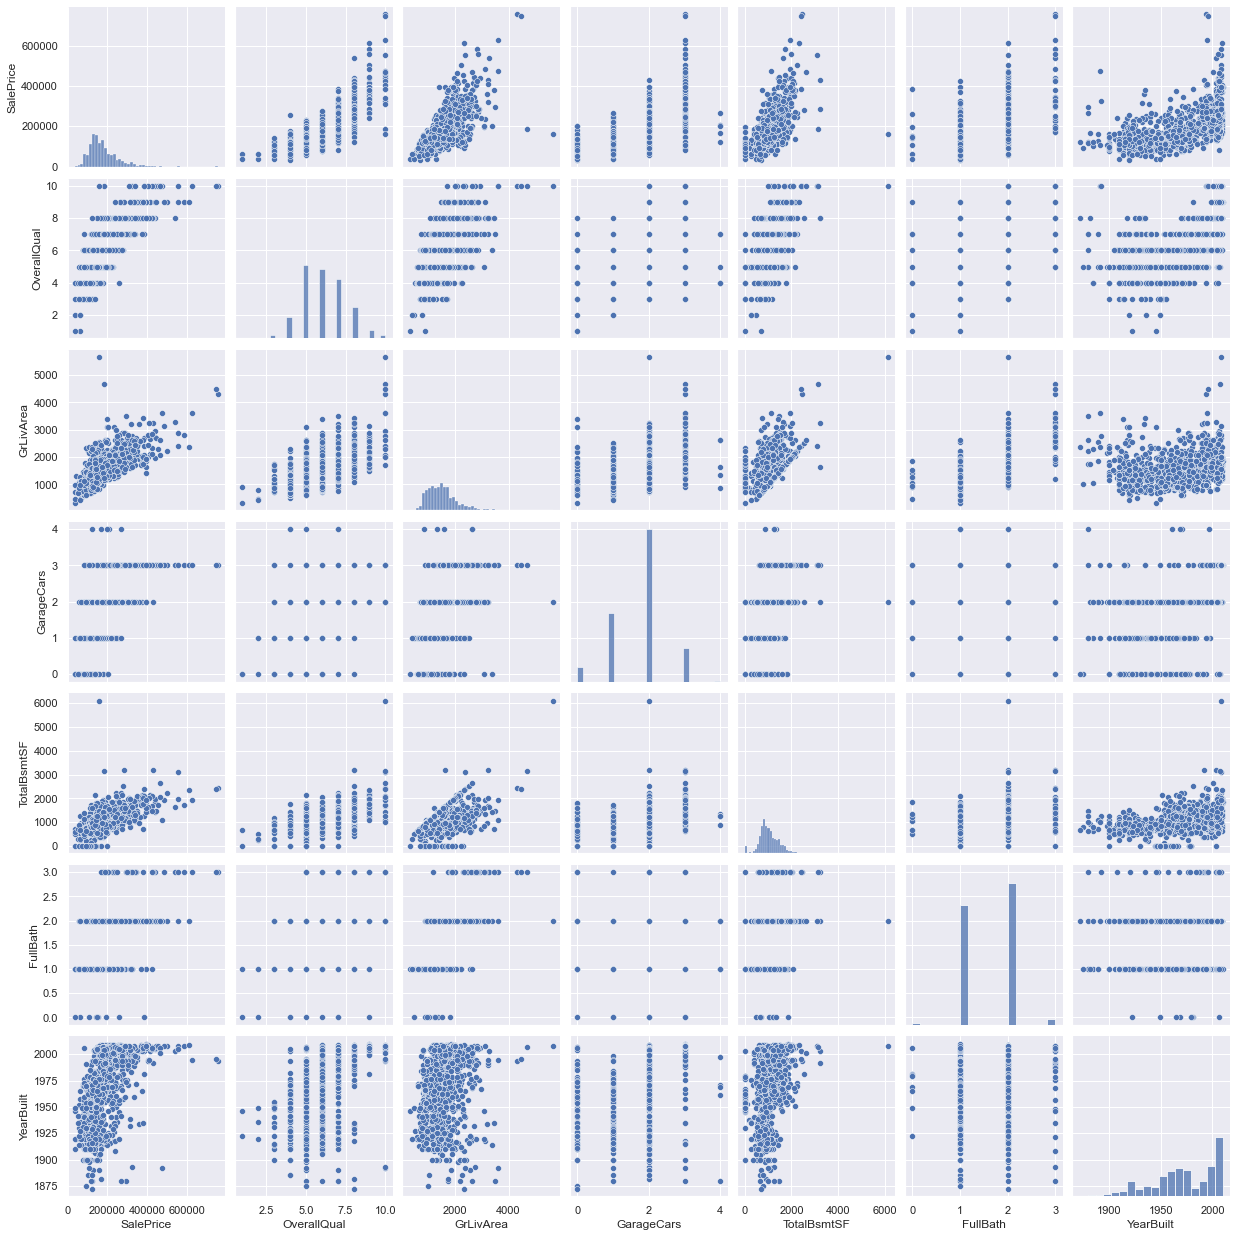

In [24]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing_data[cols], size = 2.5)
plt.show();

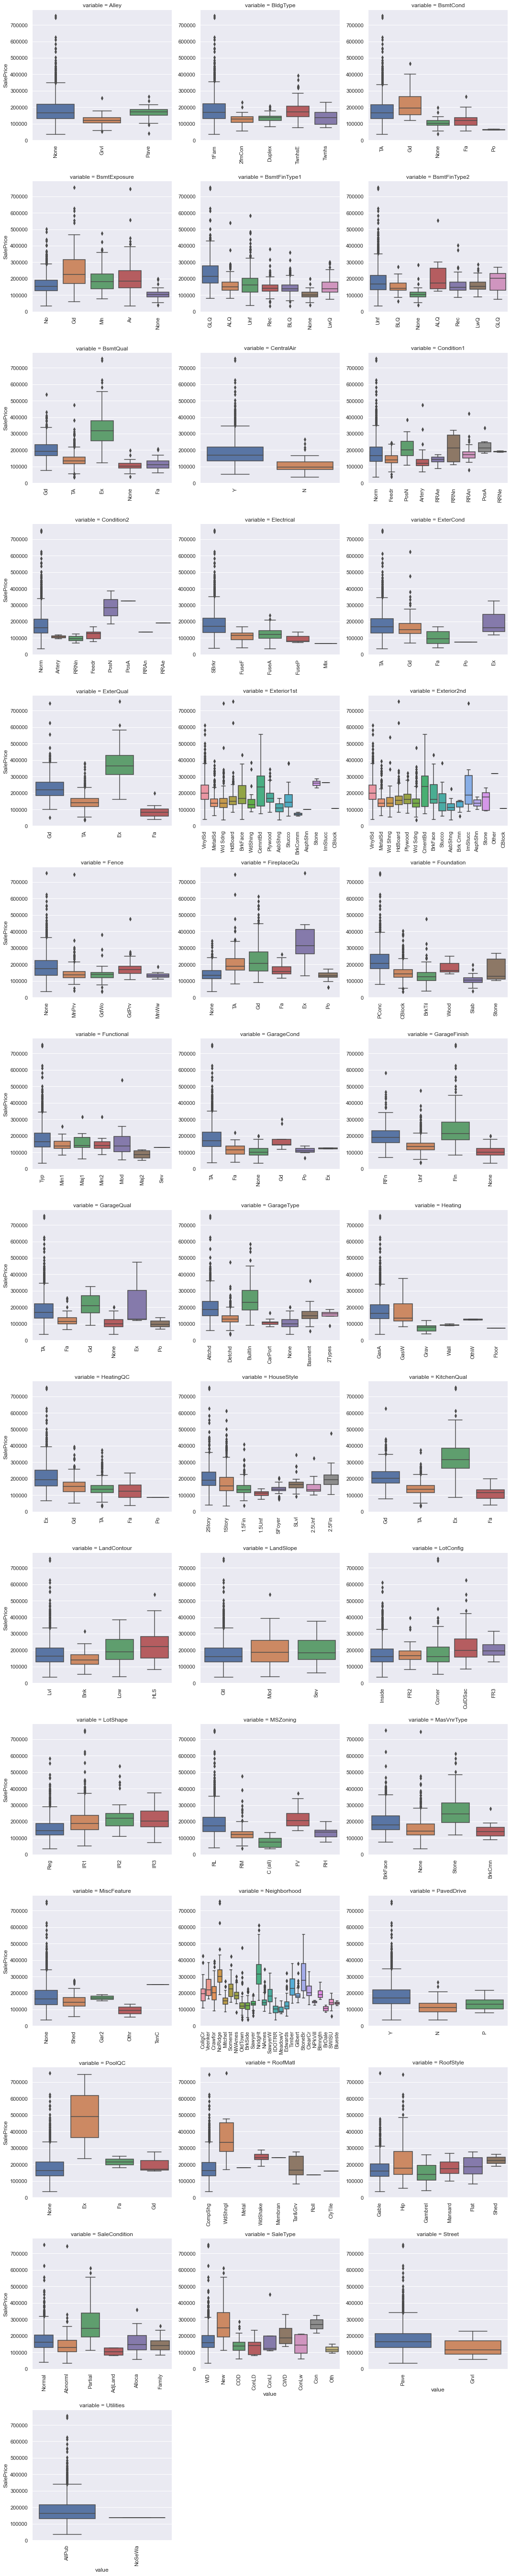

In [25]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = housing_data.select_dtypes(exclude=['int64','float64'])
f = pd.melt(housing_data, id_vars=['SalePrice'], value_vars=sorted(housing_data[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

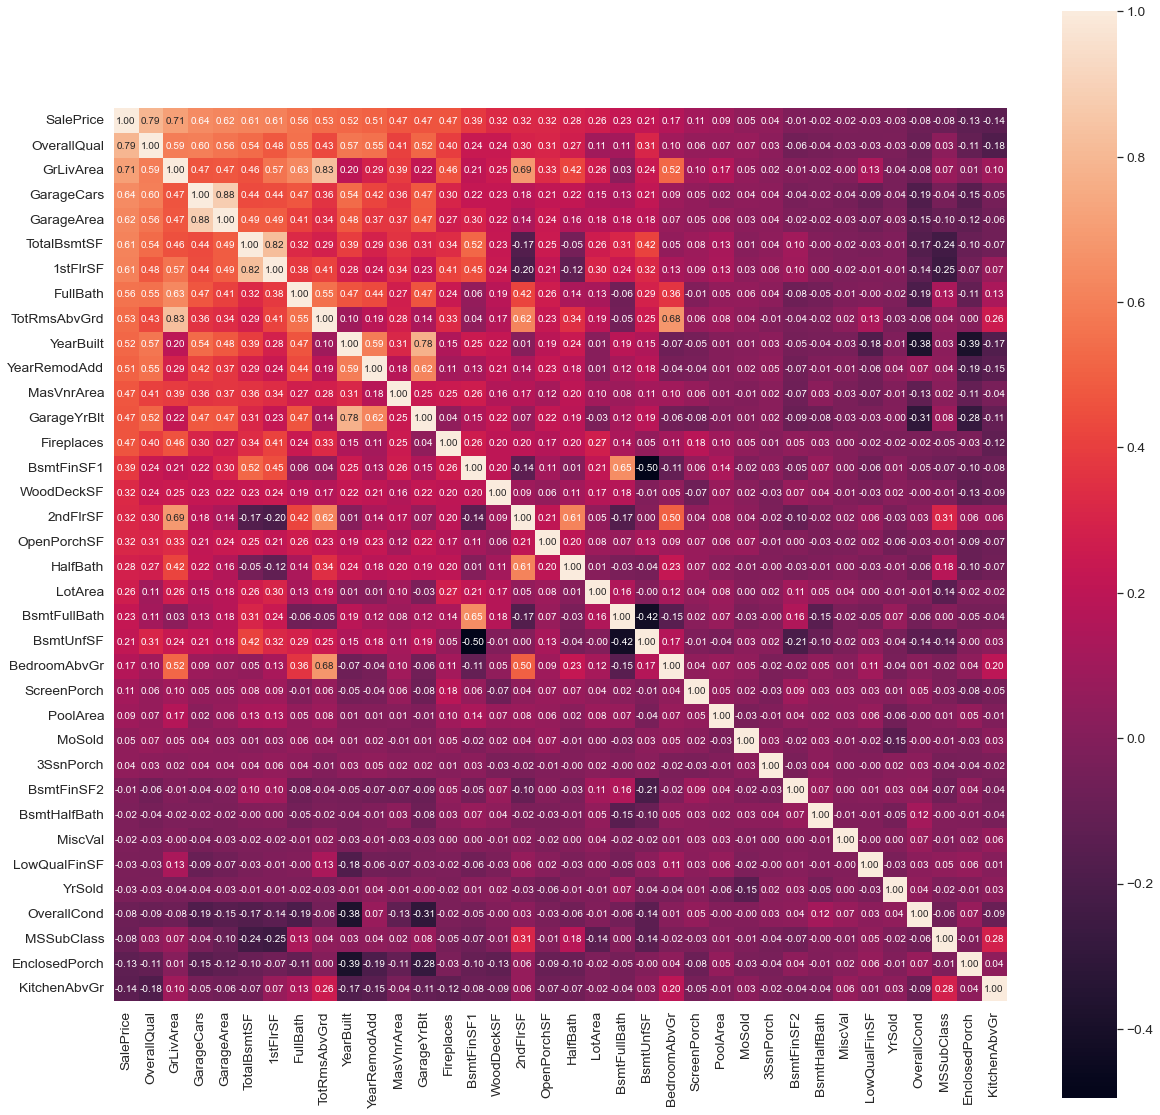

In [26]:
#saleprice correlation matrix
corrmat = housing_data.corr()
k = 40 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Using the scatterplots, boxplot, heatmap we find out and oserved the high correlated varibles with the salesprice then after We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

#### iii. Data Preparation

In [27]:
# Creating a new Column to determine the age of the property
housing_data['age']=housing_data['YrSold']-housing_data['YearBuilt']
housing_data['garage_age'] = housing_data['YrSold'] - housing_data['GarageYrBlt']
housing_data['remodel_age'] = housing_data['YrSold'] - housing_data['YearRemodAdd']

housing_data.drop('GarageYrBlt',axis=1,inplace=True)

In [28]:
# We need to convert some Numerical Column to String columns since they are categorical variables. 
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [29]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
housing_data[['MSSubClass']] = housing_data[['MSSubClass']].astype(str) 
housing_data['YrSold'] = housing_data['YrSold'].astype(str)
housing_data['MoSold'] = housing_data['MoSold'].astype(str)
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,0,2,2008,WD,Normal,208500,5,5.0,5
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,0,5,2007,WD,Normal,181500,31,31.0,31
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,0,9,2008,WD,Normal,223500,7,7.0,6
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,0,2,2006,WD,Abnorml,140000,91,8.0,36
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,0,12,2008,WD,Normal,250000,8,8.0,8


In [30]:
#type of each feature in data: int, float, object
types_train = housing_data.dtypes 
#numerical values are either type int or float
num_train = types_train[(types_train == 'int64') | (types_train == float)] 
#categorical values are type object
cat_train = types_train[types_train == object] 

In [31]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     46
int64      33
float64     2
Name: 0, dtype: int64

In [32]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [33]:
#Numerical features in our data. 
print(numerical_values_train)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'age', 'garage_age', 'remodel_age']


In [34]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [35]:
print(categorical_values_train)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [36]:
for i in categorical_values_train:
    feature_set = set(housing_data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing_data.loc[housing_data[i] == j, i] = feature_list.index(j)

In [37]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,14,3,8450,1,0,0,2,1,1,1,...,0,0,4,4,7,3,208500,5,5.0,5
1,12,3,9600,1,0,0,2,1,0,1,...,0,0,11,1,7,3,181500,31,31.0,31
2,14,3,11250,1,0,2,2,1,1,1,...,0,0,0,4,7,3,223500,7,7.0,6
3,13,3,9550,1,0,2,2,1,4,1,...,0,0,4,2,7,1,140000,91,8.0,36
4,14,3,14260,1,0,2,2,1,0,1,...,0,0,9,4,7,3,250000,8,8.0,8


#### changed all the categorical strings into a representative number. We are ready to build our models!

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

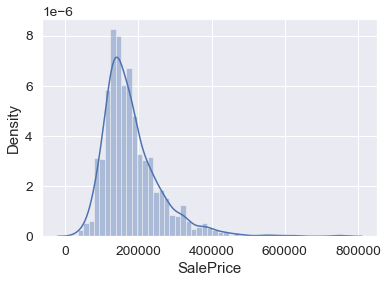

In [38]:
sns.distplot(housing_data["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

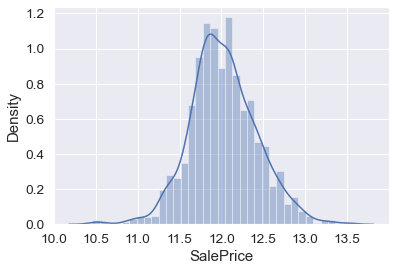

In [39]:
sns.distplot(np.log(housing_data["SalePrice"]))

In [40]:
housing_data["TransformedPrice"] = np.log(housing_data["SalePrice"])

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. transformed the prices, boost model performance.


####  iv. Model building and evaluation.
Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [41]:
X = housing_data.drop('SalePrice',axis=1)
y = housing_data['SalePrice']

In [42]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

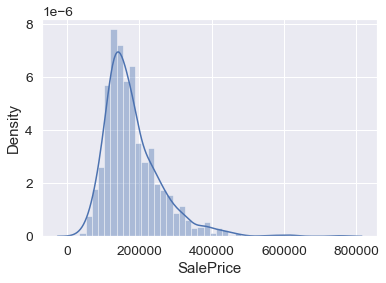

In [43]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [44]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

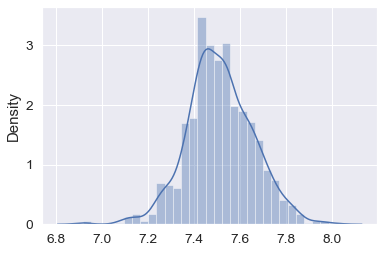

In [45]:
sns.distplot(y_train)
plt.show()

In [46]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [47]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,garage_age,remodel_age,TransformedPrice
0,0.857143,0.75,0.031403,1.0,0.0,0.000000,0.666667,1.0,0.25,0.5,...,0.0,0.0,0.545455,0.25,0.875,0.6,0.392593,0.476636,0.885246,0.399006
1,1.000000,0.75,0.241524,1.0,0.0,0.333333,0.000000,1.0,1.00,0.0,...,0.0,0.0,0.272727,0.25,0.875,0.6,0.111111,0.140187,0.262295,0.627198
2,1.000000,0.75,0.031254,1.0,0.0,0.000000,0.666667,1.0,0.25,0.5,...,0.0,0.0,0.636364,1.00,0.875,0.6,0.037037,0.046729,0.098361,0.606060
3,0.571429,0.75,0.039052,1.0,0.0,0.000000,0.666667,1.0,0.25,0.5,...,0.0,0.0,1.000000,0.00,0.875,0.6,0.333333,0.280374,0.754098,0.342422
4,0.428571,0.25,0.000065,1.0,0.0,0.000000,0.666667,1.0,0.25,0.5,...,0.0,0.0,1.000000,0.00,0.875,0.6,0.281481,0.280374,0.639344,0.251005


In [48]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

[6.03837323e+10]
[[-7.58138322e-04  1.79866051e-04 -4.62465127e-03 -1.09975630e-03
   1.52922528e-03 -2.97106395e-04 -1.00816365e-03 -2.27300972e-03
   7.71009958e-05  6.53164394e-04 -4.68070277e-04 -1.81689684e-04
   4.54734963e-03  9.30316407e-04  1.92182119e-03 -1.66421634e-03
   2.41435999e-03 -1.10482936e+11  4.91035272e+10  2.19922054e-04
  -3.10257912e-03  8.49122069e-05  1.18339193e-04  1.31130557e-03
  -6.69535859e-03  1.33069193e-03  1.90733286e-03  2.47691629e-04
   2.76409430e-03  1.25509509e-03 -2.24458926e-03  1.08057204e-03
  -7.04624785e+09  2.52407159e-04 -1.84021427e+09 -2.91637756e+09
   7.62802522e+09  1.85693371e-03  1.88766501e-05 -2.84304055e-03
  -2.40560065e-03  1.16040845e+10  5.02843660e+09  1.38335729e+09
  -1.39786240e+10  8.83420745e-04  1.61745287e-04  1.16136718e-03
   1.03830071e-03  8.15012204e-03  8.10134630e-03  2.01653722e-03
  -9.10340718e-04 -1.22633102e-03 -1.41973691e-03  8.53294298e-04
   5.09109121e-04  6.80210439e-04  4.10534927e-04 -3.124754

In [50]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9996062599194433
0.9991306185383838
0.007956250630651893
0.008301276551910385
8.143552334341754e-06
1.722256546039499e-05


## Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


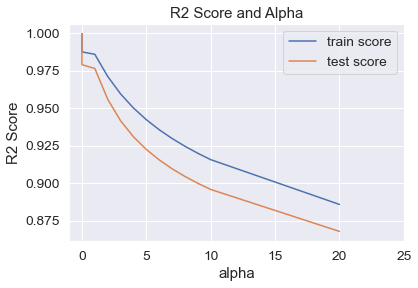

The optimum alpha is 0
The R2 Score of the model on the test dataset for optimum alpha is 0.9991603184675851
The MSE of the model on the test dataset for optimum alpha is 1.6634205807674167e-05


In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [52]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
34,BsmtFinSF2,inf
32,BsmtFinSF1,inf
79,remodel_age,inf
35,BsmtUnfSF,inf
77,age,inf
36,TotalBsmtSF,inf
41,1stFlrSF,inf
42,2ndFlrSF,inf
43,LowQualFinSF,inf
44,GrLivArea,inf


In [53]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


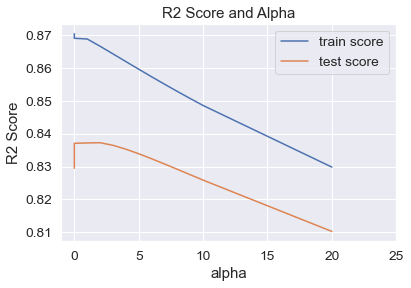

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8527753412851128
The MSE of the model on the test dataset for optimum alpha is 0.002916540591270374


In [54]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [55]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

,Ridge Co-Efficient
OverallQual,0.244303
TotRmsAbvGrd,0.114528
OverallCond,0.106845
FullBath,0.094610
LotArea,0.091830
BsmtFullBath,0.089441
GarageCars,0.075181
GarageArea,0.059439
Fireplaces,0.054638
Street,0.053799


The Top 20 features impacting the price of the property is stated above.

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [57]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 4.61941272e-03  4.26282670e-03  3.69946153e-02  2.23015439e-02
   6.32104088e-03  3.27062663e-03  1.19059288e-03  8.10948960e-03
   5.19132260e-03 -2.64652463e-03 -1.13094095e-02 -2.24229455e-02
  -1.84328160e-02 -8.55857136e-03 -9.19976097e-04  9.48572538e-02
   5.16069297e-02  1.06145491e-02 -1.19656702e-03  1.69619957e-04
   7.74963038e-03 -3.19452292e-04 -2.38720352e-03 -7.00833690e-04
   2.65795392e-03  1.32246304e-02  7.53266193e-03 -8.28396135e-03
  -1.35439066e-02  1.13429950e-02  1.42053801e-02 -1.10240107e-03
   2.93936682e-02 -5.97808342e-03  1.60236696e-02  7.60193003e-03
   3.39238725e-02 -3.16962540e-03 -1.42734229e-02 -1.74273835e-02
   3.33018439e-04  5.88010491e-02  1.49994677e-02  6.57623683e-03
   5.48590118e-02  3.28961758e-02  1.01079811e-02  2.95924478e-02
   1.23121322e-02  1.73259284e-02 -1.75067468e-02 -4.39255432e-03
   2.63921772e-02  2.23047290e-02  2.03675823e-02  3.66824656e-03
  -2.84763206e-03  4.17504936e-03  2.96451429e-02  2.06253155e-02
   1.21170

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9734228590404502
0.9637270716946058
0.5370405629556396
0.34635154130264145
0.0005496832783578706
0.000718571662453613


#### Lasso Regression
we try a Lasso Model as well to check it's overall perfromance.

In [59]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8564535203566637
The MSE of the model on the test dataset for optimum alpha is 0.002843675361642544


Fitting 11 folds for each of 11 candidates, totalling 121 fits


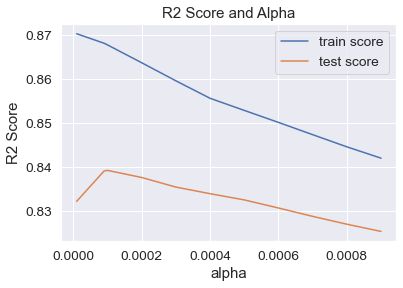

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8564535203566637
The MSE of the model on the test dataset for optimum alpha is 0.002843675361642544


In [60]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [61]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
OverallQual,0.295341
LotArea,0.140223
TotRmsAbvGrd,0.122909
OverallCond,0.112879
BsmtFullBath,0.094753
FullBath,0.091592
GarageCars,0.079479
Street,0.055117
ScreenPorch,0.052600
Fireplaces,0.051109


The top 20 features of the final Lasso model is stated above.

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [71]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [64]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.19269695e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.76386928e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9990370185633133
0.9987685019375521
38847.07266052114
9029.480530534098
1.9916920105189475e-05
2.4396144766454407e-05


In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.999606,0.973423,0.999037
1,R2 Score (Test),0.999131,0.963727,0.998769
2,RSS (Train),0.007956,0.537041,38847.072661
3,RSS (Test),0.008301,0.346352,9029.480531
4,MSE (Train),0.002854,0.023445,0.004463
5,MSE (Test),0.004150,0.026806,0.004939


#### Ridge Regression Model value

In [67]:
ridge_final2

Ridge(alpha=2, random_state=100)

#### Lasso Regression Model Value

In [68]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)

#### Achieve the R2 score on both Ridge and Lasso Models. The follwing factors influence the house price the most as demosntrated by both the models:-

1. Overquality of the house
2. Total rooms above grade (does not include bathrooms)
3. Lot size in square feet
4. OverallCondition of the house
5. Basement full bathrooms in the house
6. Full bathrooms above grade in that house
7. GarageCars: Size of garage in car capacity in that house
8. Condition2: Proximity to various conditions (if more than one is present)
9. Street: Type of road access to property
10. GarageArea: Size of garage in square feet

#### Analyzing Ridge Model by doubling the value of alpha to 4 & Lasso Model by doubling the value of alpha to 0.0002

In [69]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_double = Ridge(alpha=4,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8469338867376532
The MSE of the model on the test dataset for doubled alpha is 0.00303226060345067
The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
OverallQual,0.214997
TotRmsAbvGrd,0.106434
OverallCond,0.097008
FullBath,0.092656
BsmtFullBath,0.082423
GarageCars,0.074010
LotArea,0.060921
GarageArea,0.059595
Fireplaces,0.055459
BsmtExposure,0.045796


In [70]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8532703044072334
The MSE of the model on the test dataset for doubled alpha is 0.002906735304238653
The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
OverallQual,0.301942
TotRmsAbvGrd,0.119150
OverallCond,0.105417
BsmtFullBath,0.093214
FullBath,0.090763
LotArea,0.083099
GarageCars,0.081742
Fireplaces,0.053370
GarageArea,0.046391
ScreenPorch,0.042611


#### we observed the above two observations i.e., Lasso Model by doubling the value of alpha to 0.0002 and Ridge Model by doubling the value of alpha to 4. r^2 score is decreasing. finally we observed that best alpha value of Ridge and lasso regression is 2 and 0.0001.